#                                  Multi Label Clasification - 1D

# Load Data

In [27]:
import pandas as pd
import os

In [28]:

file_name = "diabetes_dataset"
root_folder = f'multi-label-clasification/one-d/{file_name}/' 
os.makedirs(root_folder, exist_ok=True)

df = pd.read_csv('sample_data/'+file_name+'.csv')

#buang kolom tidak dibutuhkan
df.drop(columns=['diagnosed_diabetes'], inplace=True)

print("Sebulum DROP nan : " + str(df.shape) )
df = df.dropna() #Drop Nan
print("Setelah DROP nan : " + str(df.shape) )

Sebulum DROP nan : (100000, 30)
Setelah DROP nan : (100000, 30)


In [29]:
df.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  cholesterol_total  \
0                                 215         5.7  ...                239   
1                                 143         6.7  ...                116   
2                                  57         6.4  ...                213   
3                                  49         3.4  ...                171   
4                                 109         7.2  ...                210   

   hdl_cholesterol  ldl_cholesterol  triglycerides  glucose_fasting  \
0               41              160            145              136   
1               55               50             30               93   
2               66               99             36              118   
3               50               79            140              139   
4               52              125            160              137   

   glucose_postprandial  insulin_level  hba1c  diabetes_risk_score  \
0                   236           6.36   8.18                 29.6   
1                   150           2.00   5.63                 23.0   
2                   195           5.07   7.51                 44.7   
3                   253           5.28   9.03                 38.2   
4                   184          12.74   7.20                 23.5   

   diabetes_stage  
0          Type 2  
1     No Diabetes  
2          Type 2  
3          Type 2  
4          Type 2  

[5 rows x 30 columns]

#### LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#labeling
df['label_gender']            = le.fit_transform(df['gender'])
df['label_ethnicity']         = le.fit_transform(df['ethnicity'])
df['label_income_level']      = le.fit_transform(df['income_level'])
df['label_education_level']   = le.fit_transform(df['education_level'])
df['label_employment_status'] = le.fit_transform(df['employment_status'])
df['label_smoking_status']    = le.fit_transform(df['smoking_status'])

In [31]:
df.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  insulin_level  hba1c  \
0                                 215         5.7  ...           6.36   8.18   
1                                 143         6.7  ...           2.00   5.63   
2                                  57         6.4  ...           5.07   7.51   
3                                  49         3.4  ...           5.28   9.03   
4                                 109         7.2  ...          12.74   7.20   

   diabetes_risk_score  diabetes_stage  label_gender  label_ethnicity  \
0                 29.6          Type 2             1                0   
1                 23.0     No Diabetes             0                4   
2                 44.7          Type 2             1                2   
3                 38.2          Type 2             0                1   
4                 23.5          Type 2             1                4   

   label_income_level  label_education_level  label_employment_status  \
0                   2                      1                        0   
1                   3                      1                        0   
2                   3                      1                        3   
3                   1                      1                        1   
4                   3                      0                        1   

   label_smoking_status  
0                     2  
1                     1  
2                     2  
3                     2  
4                     2  

[5 rows x 36 columns]

#### Scaler

In [32]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Contoh: buat dan fit scaler
scaler = MinMaxScaler()
cols = [
    'label_gender', 
    'label_ethnicity', 
    'label_income_level',
    'label_education_level',
    'label_employment_status', 
    'label_smoking_status',
    #--------------------------
    'age',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    'diabetes_risk_score'
]

# Dictionary untuk menyimpan hasil transformasi
scaled_data = {}

# Loop untuk setiap kolom
for col in cols:
    scaler = MinMaxScaler()
    df[[col]] = scaler.fit_transform(df[[col]])  # scaling per kolom
    joblib.dump(scaler, os.path.join(root_folder, f'scaler_{col}.pkl'))
    scaled_data[col] = scaler
    print(f"✅ Scaler for '{col}' saved as scaler_{col}.pkl")

print("\nAll individual scalers saved successfully!")

✅ Scaler for 'label_gender' saved as scaler_label_gender.pkl
✅ Scaler for 'label_ethnicity' saved as scaler_label_ethnicity.pkl
✅ Scaler for 'label_income_level' saved as scaler_label_income_level.pkl
✅ Scaler for 'label_education_level' saved as scaler_label_education_level.pkl
✅ Scaler for 'label_employment_status' saved as scaler_label_employment_status.pkl
✅ Scaler for 'label_smoking_status' saved as scaler_label_smoking_status.pkl
✅ Scaler for 'age' saved as scaler_age.pkl
✅ Scaler for 'physical_activity_minutes_per_week' saved as scaler_physical_activity_minutes_per_week.pkl
✅ Scaler for 'diet_score' saved as scaler_diet_score.pkl
✅ Scaler for 'sleep_hours_per_day' saved as scaler_sleep_hours_per_day.pkl
✅ Scaler for 'glucose_postprandial' saved as scaler_glucose_postprandial.pkl
✅ Scaler for 'insulin_level' saved as scaler_insulin_level.pkl
✅ Scaler for 'hba1c' saved as scaler_hba1c.pkl
✅ Scaler for 'diabetes_risk_score' saved as scaler_diabetes_risk_score.pkl

All individual sc

In [33]:
df.head()

age  gender ethnicity education_level  income_level employment_status  \
0  0.555556    Male     Asian      Highschool  Lower-Middle          Employed   
1  0.416667  Female     White      Highschool        Middle          Employed   
2  0.583333    Male  Hispanic      Highschool        Middle        Unemployed   
3  0.777778  Female     Black      Highschool           Low           Retired   
4  0.388889    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  insulin_level  \
0                            0.258103        0.57  ...       0.144275   
1                            0.171669        0.67  ...       0.000000   
2                            0.068427        0.64  ...       0.101588   
3                            0.058824        0.34  ...       0.108537   
4                            0.130852        0.72  ...       0.355394   

      hba1c  diabetes_risk_score  diabetes_stage  label_gender  \
0  0.720690             0.417054          Type 2           0.5   
1  0.281034             0.314729     No Diabetes           0.0   
2  0.605172             0.651163          Type 2           0.5   
3  0.867241             0.550388          Type 2           0.0   
4  0.551724             0.322481          Type 2           0.5   

   label_ethnicity  label_income_level  label_education_level  \
0             0.00                0.50               0.333333   
1             1.00                0.75               0.333333   
2             0.50                0.75               0.333333   
3             0.25                0.25               0.333333   
4             1.00                0.75               0.000000   

   label_employment_status  label_smoking_status  
0                 0.000000                   1.0  
1                 0.000000                   0.5  
2                 1.000000                   1.0  
3                 0.333333                   1.0  
4                 0.333333                   1.0  

[5 rows x 36 columns]

#### Mapping label

In [34]:
import json
mapping_dicts = {}

cols = [
    'gender',
    'ethnicity',
    'education_level',
    'income_level',
    'employment_status',
    'smoking_status'
]

for col in cols:
    label_col = f"label_{col}"
    mapping_dicts[col] = dict(zip(df[col], df[label_col]))


with open(root_folder + 'label_mappings.json', 'w') as f:
    json.dump(mapping_dicts, f, indent=2)

rows = []
for col, mapping in mapping_dicts.items():
    for k, v in mapping.items():
        rows.append({'feature': col, 'original_value': k, 'label_value': v})

mapping_table = pd.DataFrame(rows)
print(mapping_table)

              feature original_value  label_value
0              gender           Male     0.500000
1              gender         Female     0.000000
2              gender          Other     1.000000
3           ethnicity          Asian     0.000000
4           ethnicity          White     1.000000
5           ethnicity       Hispanic     0.500000
6           ethnicity          Black     0.250000
7           ethnicity          Other     0.750000
8     education_level     Highschool     0.333333
9     education_level       Graduate     0.000000
10    education_level   Postgraduate     1.000000
11    education_level      No formal     0.666667
12       income_level   Lower-Middle     0.500000
13       income_level         Middle     0.750000
14       income_level            Low     0.250000
15       income_level   Upper-Middle     1.000000
16       income_level           High     0.000000
17  employment_status       Employed     0.000000
18  employment_status     Unemployed     1.000000


#### Select Kolom To Trian

In [35]:
col_target = 'diabetes_stage'
cols = [
    'label_gender', 
    #'label_ethnicity', 
    #'label_income_level',
    #'label_education_level',
    #'label_employment_status', 
    'label_smoking_status',
    #--------------------------
    'age',
    'physical_activity_minutes_per_week',
    #'diet_score',
    #'sleep_hours_per_day',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    'diabetes_risk_score',
    #------------------------
    col_target
]
df = df[cols].copy()

In [36]:
df.head()

label_gender  label_smoking_status       age  \
0           0.5                   1.0  0.555556   
1           0.0                   0.5  0.416667   
2           0.5                   1.0  0.583333   
3           0.0                   1.0  0.777778   
4           0.5                   1.0  0.388889   

   physical_activity_minutes_per_week  glucose_postprandial  insulin_level  \
0                            0.258103              0.764977       0.144275   
1                            0.171669              0.368664       0.000000   
2                            0.068427              0.576037       0.101588   
3                            0.058824              0.843318       0.108537   
4                            0.130852              0.525346       0.355394   

      hba1c  diabetes_risk_score diabetes_stage  
0  0.720690             0.417054         Type 2  
1  0.281034             0.314729    No Diabetes  
2  0.605172             0.651163         Type 2  
3  0.867241             0.550388         Type 2  
4  0.551724             0.322481         Type 2

#### cek keseimbangan data

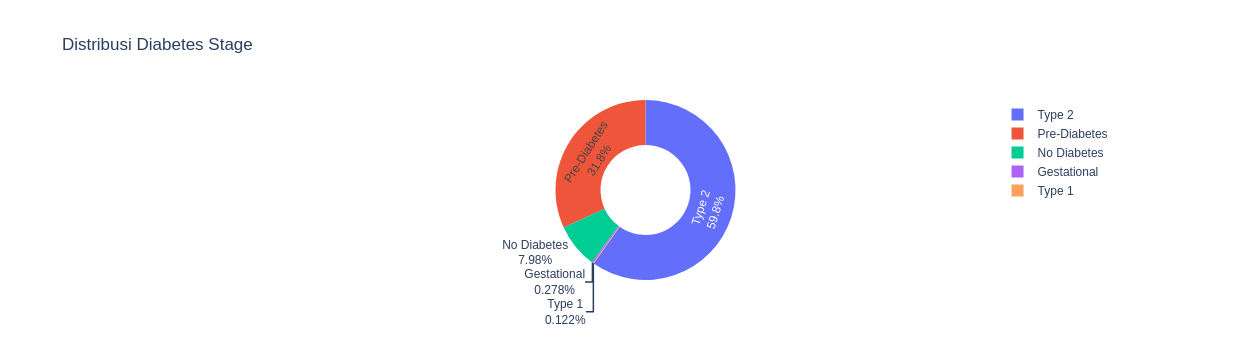

In [37]:
import plotly.express as px

fig = px.pie(
    df,
    names=col_target,
    hole=0.5,  # membuatnya jadi donat
    title='Distribusi Diabetes Stage',
)
fig.update_traces(textinfo='percent+label')
fig.show()

#### Tentukan target -> one-hot encoding

In [38]:
y_counts = df[col_target].value_counts(normalize=True)
labels = list(y_counts.index)

df_y_encoded = pd.get_dummies(df[col_target], prefix='y')

# Pastikan semua nama kolom lowercase dan spasi → underscore
df_y_encoded.columns = (
    df_y_encoded.columns.str.lower()
                        .str.replace(' ', '_')
)

# Gabungkan ke DataFrame utama
df = pd.concat([df.drop(col_target, axis=1), df_y_encoded.astype(int)], axis=1)

In [39]:
df.head()

label_gender  label_smoking_status       age  \
0           0.5                   1.0  0.555556   
1           0.0                   0.5  0.416667   
2           0.5                   1.0  0.583333   
3           0.0                   1.0  0.777778   
4           0.5                   1.0  0.388889   

   physical_activity_minutes_per_week  glucose_postprandial  insulin_level  \
0                            0.258103              0.764977       0.144275   
1                            0.171669              0.368664       0.000000   
2                            0.068427              0.576037       0.101588   
3                            0.058824              0.843318       0.108537   
4                            0.130852              0.525346       0.355394   

      hba1c  diabetes_risk_score  y_gestational  y_no_diabetes  \
0  0.720690             0.417054              0              0   
1  0.281034             0.314729              0              1   
2  0.605172             0.651163              0              0   
3  0.867241             0.550388              0              0   
4  0.551724             0.322481              0              0   

   y_pre-diabetes  y_type_1  y_type_2  
0               0         0         1  
1               0         0         0  
2               0         0         1  
3               0         0         1  
4               0         0         1

# Data Load To Train

#### Split data

In [40]:
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Misal df sudah berisi semua data
# Pisahkan fitur dan target
feature_cols = [col for col in df.columns if not col.startswith('y_')]
target_cols = [col for col in df.columns if col.startswith('y_')]

# Pisahkan train-test (stratify opsional jika masih punya kolom 'diabetes_stage')
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)


#### DataLoader

In [41]:
from data_set import MultiLabel1DDataset

# Buat dataset dengan class kamu
train_dataset = MultiLabel1DDataset(X_train, feature_cols, target_cols, normalize=False)
test_dataset  = MultiLabel1DDataset(X_test, feature_cols, target_cols, normalize=False)

# Buat DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Cek contoh batch
for X, y in train_loader:
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    print(X[:3])  # contoh fitur
    print(y[:3])  # contoh label
    break

X shape: torch.Size([32, 8])
y shape: torch.Size([32, 5])
tensor([[0.0000, 1.0000, 0.2639, 0.0876, 0.4839, 0.2660, 0.5086, 0.3194],
        [0.0000, 1.0000, 0.0000, 0.1044, 0.3917, 0.1866, 0.4086, 0.2202],
        [0.0000, 1.0000, 0.7917, 0.0372, 0.4516, 0.3117, 0.4603, 0.7674]])
tensor([[0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.]])


# Config

In [42]:
from jcopdl.callback import Callback, set_config

config = set_config({
    "labels"         : labels,
    "threshold"      : 0.5,
    "input_dim"      : len(test_dataset.X[0]),
    "hidden_dims"    : [ 8,8],
    "output_dim"     : len(labels),
    "dropout"        : 0.1,
    "activation"     : "relu",
    "early_stop_patience" : 5,
    "col_target"     : col_target,
    "cols"           : cols
})
config

Config(activation=relu, col_target=diabetes_stage, cols=['label_gender', 'label_smoking_status', 'age', 'physical_activity_minutes_per_week', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'diabetes_stage'], dropout=0.1, early_stop_patience=5, hidden_dims=[8, 8], input_dim=8, labels=['Type 2', 'Pre-Diabetes', 'No Diabetes', 'Gestational', 'Type 1'], output_dim=5, threshold=0.5)

# MCOC

#### Model - Criterion - Optimizer - Callback

In [43]:
from class_lib import MultiLabel1DClassifier
from torch import optim, nn
from jcopdl.callback import Callback

#Model
model = MultiLabel1DClassifier(input_dim=config.input_dim, hidden_dims=config.hidden_dims, output_dim=config.output_dim, dropout=config.dropout, activation=config.activation).to(device)

#Criterion
criterion = nn.BCELoss()

#Optimizer
optim = optim.AdamW(model.parameters(), lr=0.001)

#Callback
callback = Callback(model, config, outdir=root_folder,early_stop_patience=config.early_stop_patience)

#### Visualisasi Model

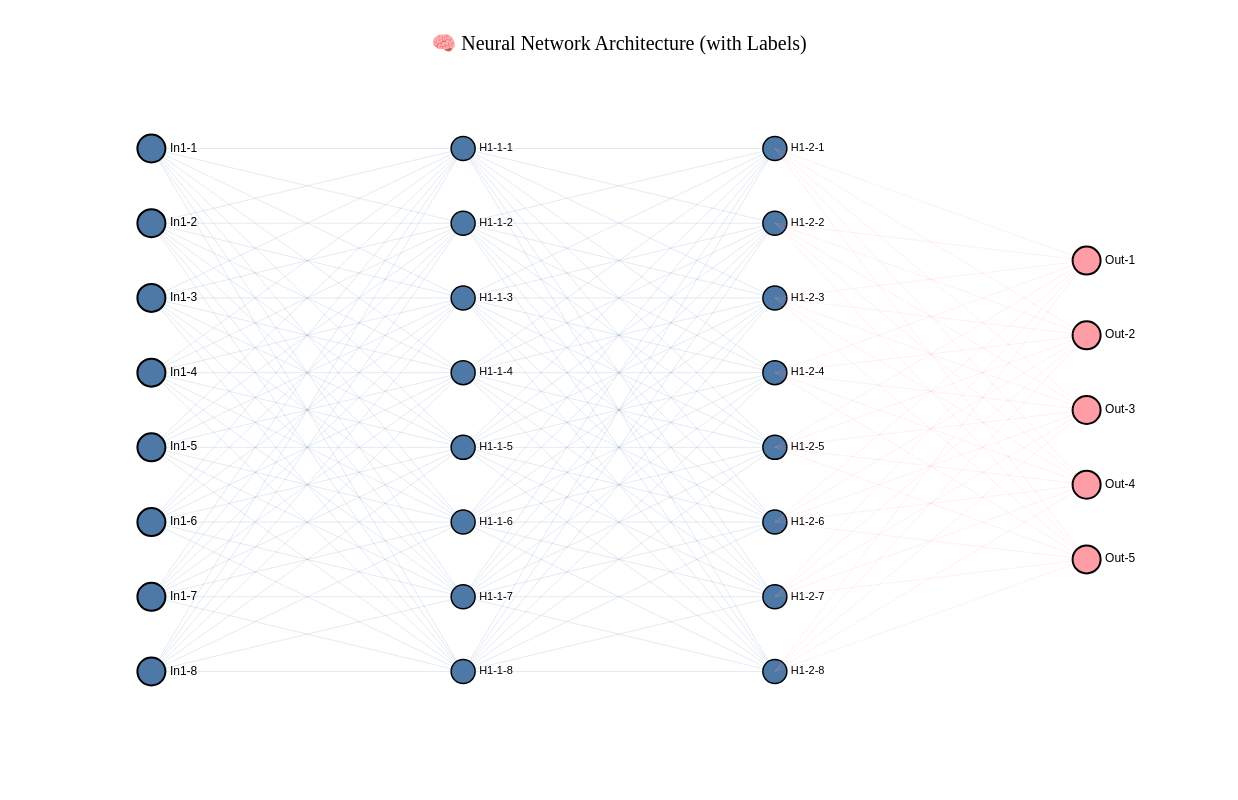

In [44]:
from visualization import plot_dynamic_multi_input_network
plot_dynamic_multi_input_network(
    input_dims=[config.input_dim],
    hidden_dims_per_branch=[
        config.hidden_dims
    ],
    combined_dims=None,
    output_dim=config.output_dim,
    figsize=(1000, 800)
)


# Training


─────────────────────────────────────────────────── 🚀 EPOCH 1 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1719.21it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2678 │ 0.1937 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.1318 │ 0.0903 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.5831 │ 0.7480 │ │ No Diabetes  │  0.7685  │
│ Micro F1         │ 0.6394 │ 0.7681 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.2323 │ 0.3116 │ │    Type 1    │  0.8620  │
│ Overall Accuracy │ 0.8682 │ 0.9097 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     1
Train_cost  = 0.2678 | Test_cost  = 0.1937 | Train_score = 0.8682 | Test_score = 0.9097 |


─────────────────────────────────────────────────── 🚀 EPOCH 2 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1964.03it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1926 │ 0.1715 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0929 │ 0.0824 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.7454 │ 0.7837 │ │ No Diabetes  │  0.7943  │
│ Micro F1         │ 0.7631 │ 0.7919 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.3103 │ 0.3247 │ │    Type 1    │  0.8760  │
│ Overall Accuracy │ 0.9072 │ 0.9176 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     2
Train_cost  = 0.1926 | Test_cost  = 0.1715 | Train_score = 0.9072 | Test_score = 0.9176 |


─────────────────────────────────────────────────── 🚀 EPOCH 3 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1846.28it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1724 │ 0.1536 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0785 │ 0.0658 │ │ Pre-Diabetes │  0.9428  │
│ Subset Accuracy  │ 0.7817 │ 0.8212 │ │ No Diabetes  │  0.8494  │
│ Micro F1         │ 0.8017 │ 0.8331 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.4127 │ 0.4598 │ │    Type 1    │  0.8827  │
│ Overall Accuracy │ 0.9215 │ 0.9342 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     3
Train_cost  = 0.1724 | Test_cost  = 0.1536 | Train_score = 0.9215 | Test_score = 0.9342 |


─────────────────────────────────────────────────── 🚀 EPOCH 4 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1920.86it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1596 │ 0.1468 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0695 │ 0.0623 │ │ Pre-Diabetes │  0.9436  │
│ Subset Accuracy  │ 0.7993 │ 0.8264 │ │ No Diabetes  │  0.8599  │
│ Micro F1         │ 0.8227 │ 0.8416 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.4483 │ 0.4687 │ │    Type 1    │  0.8893  │
│ Overall Accuracy │ 0.9305 │ 0.9377 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     4
Train_cost  = 0.1596 | Test_cost  = 0.1468 | Train_score = 0.9305 | Test_score = 0.9377 |


─────────────────────────────────────────────────── 🚀 EPOCH 5 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1833.19it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1534 │ 0.1440 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0662 │ 0.0597 │ │ Pre-Diabetes │  0.9424  │
│ Subset Accuracy  │ 0.8094 │ 0.8312 │ │ No Diabetes  │  0.8677  │
│ Micro F1         │ 0.8309 │ 0.8477 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.4563 │ 0.4772 │ │    Type 1    │  0.8954  │
│ Overall Accuracy │ 0.9338 │ 0.9403 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     5
Train_cost  = 0.1534 | Test_cost  = 0.1440 | Train_score = 0.9338 | Test_score = 0.9403 |


─────────────────────────────────────────────────── 🚀 EPOCH 6 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1881.00it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1492 │ 0.1396 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0640 │ 0.0580 │ │ Pre-Diabetes │  0.9443  │
│ Subset Accuracy  │ 0.8171 │ 0.8308 │ │ No Diabetes  │  0.8709  │
│ Micro F1         │ 0.8368 │ 0.8513 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.4605 │ 0.4754 │ │    Type 1    │  0.8988  │
│ Overall Accuracy │ 0.9360 │ 0.9420 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     6
Train_cost  = 0.1492 | Test_cost  = 0.1396 | Train_score = 0.9360 | Test_score = 0.9420 |


─────────────────────────────────────────────────── 🚀 EPOCH 7 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1838.64it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1468 │ 0.1387 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0627 │ 0.0585 │ │ Pre-Diabetes │  0.9452  │
│ Subset Accuracy  │ 0.8212 │ 0.8276 │ │ No Diabetes  │  0.8689  │
│ Micro F1         │ 0.8402 │ 0.8499 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.4632 │ 0.4671 │ │    Type 1    │  0.8978  │
│ Overall Accuracy │ 0.9373 │ 0.9415 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     7
Train_cost  = 0.1468 | Test_cost  = 0.1387 | Train_score = 0.9373 | Test_score = 0.9415 |
==> EarlyStop patience =  1 | Best test_score: 0.9420


─────────────────────────────────────────────────── 🚀 EPOCH 8 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1846.94it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1446 │ 0.1387 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0613 │ 0.0559 │ │ Pre-Diabetes │  0.9442  │
│ Subset Accuracy  │ 0.8259 │ 0.8400 │ │ No Diabetes  │  0.8771  │
│ Micro F1         │ 0.8437 │ 0.8574 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.4660 │ 0.4808 │ │    Type 1    │  0.9034  │
│ Overall Accuracy │ 0.9387 │ 0.9441 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     8
Train_cost  = 0.1446 | Test_cost  = 0.1387 | Train_score = 0.9387 | Test_score = 0.9441 |


─────────────────────────────────────────────────── 🚀 EPOCH 9 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1702.06it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1436 │ 0.1371 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0604 │ 0.0569 │ │ Pre-Diabetes │  0.9456  │
│ Subset Accuracy  │ 0.8289 │ 0.8399 │ │ No Diabetes  │  0.8717  │
│ Micro F1         │ 0.8461 │ 0.8551 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.4676 │ 0.4767 │ │    Type 1    │  0.9021  │
│ Overall Accuracy │ 0.9396 │ 0.9431 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     9
Train_cost  = 0.1436 | Test_cost  = 0.1371 | Train_score = 0.9396 | Test_score = 0.9431 |
==> EarlyStop patience =  1 | Best test_score: 0.9441


─────────────────────────────────────────────────── 🚀 EPOCH 10 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1742.85it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1429 │ 0.1371 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0604 │ 0.0569 │ │ Pre-Diabetes │  0.9466  │
│ Subset Accuracy  │ 0.8284 │ 0.8377 │ │ No Diabetes  │  0.8720  │
│ Micro F1         │ 0.8460 │ 0.8549 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.4666 │ 0.4779 │ │    Type 1    │  0.9010  │
│ Overall Accuracy │ 0.9396 │ 0.9431 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    10
Train_cost  = 0.1429 | Test_cost  = 0.1371 | Train_score = 0.9396 | Test_score = 0.9431 |
==> EarlyStop patience =  2 | Best test_score: 0.9441


─────────────────────────────────────────────────── 🚀 EPOCH 11 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1860.27it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1421 │ 0.1382 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0598 │ 0.0561 │ │ Pre-Diabetes │  0.9433  │
│ Subset Accuracy  │ 0.8309 │ 0.8442 │ │ No Diabetes  │  0.8781  │
│ Micro F1         │ 0.8476 │ 0.8576 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.4683 │ 0.4812 │ │    Type 1    │  0.9023  │
│ Overall Accuracy │ 0.9402 │ 0.9439 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    11
Train_cost  = 0.1421 | Test_cost  = 0.1382 | Train_score = 0.9402 | Test_score = 0.9439 |
==> EarlyStop patience =  3 | Best test_score: 0.9441


─────────────────────────────────────────────────── 🚀 EPOCH 12 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 2076.95it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1416 │ 0.1366 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0595 │ 0.0569 │ │ Pre-Diabetes │  0.9453  │
│ Subset Accuracy  │ 0.8312 │ 0.8367 │ │ No Diabetes  │  0.8729  │
│ Micro F1         │ 0.8484 │ 0.8547 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.4683 │ 0.4775 │ │    Type 1    │  0.9013  │
│ Overall Accuracy │ 0.9405 │ 0.9431 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    12
Train_cost  = 0.1416 | Test_cost  = 0.1366 | Train_score = 0.9405 | Test_score = 0.9431 |
==> EarlyStop patience =  4 | Best test_score: 0.9441


─────────────────────────────────────────────────── 🚀 EPOCH 13 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1657.30it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1423 │ 0.1367 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0597 │ 0.0560 │ │ Pre-Diabetes │  0.9454  │
│ Subset Accuracy  │ 0.8318 │ 0.8404 │ │ No Diabetes  │  0.8748  │
│ Micro F1         │ 0.8480 │ 0.8572 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.4684 │ 0.4761 │ │    Type 1    │  0.9039  │
│ Overall Accuracy │ 0.9403 │ 0.9440 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    13
Train_cost  = 0.1423 | Test_cost  = 0.1367 | Train_score = 0.9403 | Test_score = 0.9440 |
==> EarlyStop patience =  5 | Best test_score: 0.9441
==> Execute Early Stopping at epoch: 13 | Best test_score: 0.9441
==> Best model is saved at multi-label-clasification/one-d/diabetes_dataset/


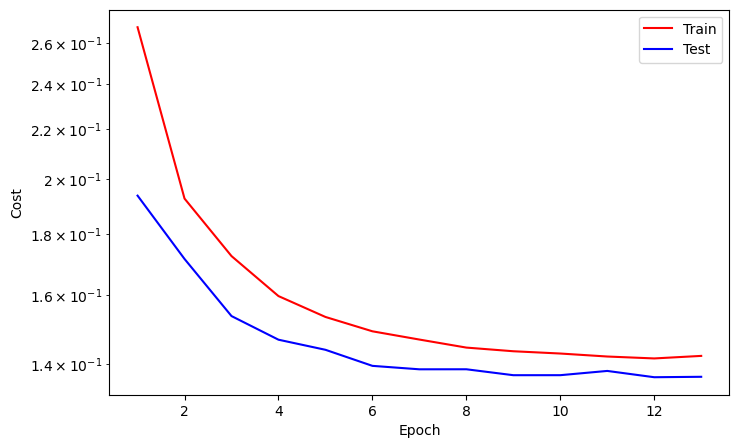

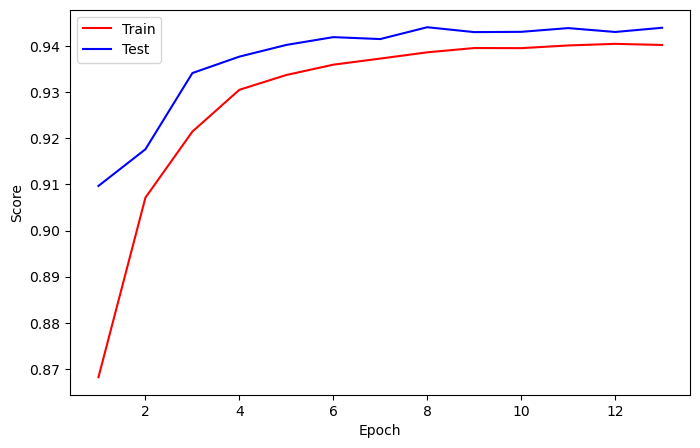

⏹️ Training dihentikan oleh early stopping.

In [45]:
from train_and_evaluate import train_and_evaluate_multi_label_1d

train_and_evaluate_multi_label_1d(
    model=model,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optim=optim,
    config=config,
    device=device,
    labels=labels,          
    callback=callback
)

# Evaluate

In [46]:
from evaluate import evaluate_multi_label_1d

hsl = evaluate_multi_label_1d(model, test_loader, target_cols,criterion, device, config.threshold)

       📊 Evaluasi Model            🎯 Per-Label Accuracy    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Metrik              ┃  Nilai ┃ ┃     Label      ┃ Akurasi ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ 🔹 Overall Accuracy │ 0.9441 │ │ y_gestational  │ 0.9971  │
│ ✅ Subset  Accuracy │ 0.8400 │ │ y_no_diabetes  │ 0.9442  │
│ 💥 Loss (avg)       │ 0.1387 │ │ y_pre-diabetes │ 0.8771  │
│ 📉 Hamming Loss     │ 0.0559 │ │    y_type_1    │ 0.9988  │
│ ⚖️  Micro F1-score   │ 0.8574 │ │    y_type_2    │ 0.9034  │
│ 📈 Macro F1-score   │ 0.4808 │ └────────────────┴─────────┘
└─────────────────────┴────────┘

In [47]:
hsl['df'].head(100)

Target                   Prediksi  Benar (%)
0   [0.0, 1.0, 0.0, 0.0, 0.0]  [0.0, 0.0, 0.0, 0.0, 0.0]       80.0
1   [0.0, 0.0, 0.0, 0.0, 1.0]  [0.0, 0.0, 0.0, 0.0, 1.0]      100.0
2   [0.0, 0.0, 1.0, 0.0, 0.0]  [0.0, 0.0, 1.0, 0.0, 0.0]      100.0
3   [0.0, 0.0, 1.0, 0.0, 0.0]  [0.0, 0.0, 1.0, 0.0, 0.0]      100.0
4   [0.0, 0.0, 0.0, 0.0, 1.0]  [0.0, 0.0, 0.0, 0.0, 0.0]       80.0
..                        ...                        ...        ...
95  [0.0, 0.0, 1.0, 0.0, 0.0]  [0.0, 0.0, 1.0, 0.0, 0.0]      100.0
96  [0.0, 0.0, 0.0, 0.0, 1.0]  [0.0, 0.0, 0.0, 0.0, 1.0]      100.0
97  [0.0, 0.0, 0.0, 0.0, 1.0]  [0.0, 0.0, 0.0, 0.0, 1.0]      100.0
98  [0.0, 0.0, 1.0, 0.0, 0.0]  [0.0, 0.0, 1.0, 0.0, 0.0]      100.0
99  [0.0, 0.0, 1.0, 0.0, 0.0]  [0.0, 0.0, 1.0, 0.0, 0.0]      100.0

[100 rows x 3 columns]

# Pengaplikasian

In [48]:
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [49]:
import torch, json
from torch import optim, nn
from class_lib import MultiLabel1DClassifier
import joblib
import pandas as pd


# Load Config
#config = torch.load(root_folder + "configs.pth", map_location="cpu", weights_only=False)
config = torch.load(root_folder + "configs.pth", map_location="cpu")

#Load Weights
weights= torch.load(root_folder + "weights_best.pth", map_location="cpu")

#Load Label Mapping
with open(root_folder + "label_mappings.json", "r") as f:
    label_mapping = json.load(f)


model = MultiLabel1DClassifier(input_dim=config.input_dim, hidden_dims=config.hidden_dims, output_dim=config.output_dim, dropout=config.dropout, activation=config.activation)
model.load_state_dict(weights)
model.eval() 

MultiLabel1DClassifier(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=8, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=8, out_features=8, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=8, out_features=5, bias=True)
    (7): Sigmoid()
  )
)

In [50]:
from aplokator import MultiLabelPredictor1D
predictor = MultiLabelPredictor1D(
    model=model,
    config=config,
    cols=config.cols,
    label_mapping=label_mapping,
    scaler_folder=root_folder,
    col_target=config.col_target
)

HTML(value='\n        <style>\n        .minimal-container { background: #f8f9fa; padding: 12px; border-radius:…